READING CSV & DATA CLEANING 

In [ ]:
df = pd.read_csv ("C:/Users/shiva/Desktop/Machine learning/dataset/steel.csv")

print("Missing values per column:\n", df.isna().sum(), "\n")
df = df.drop_duplicates()
print("Data types:\n", df.dtypes, "\n")

X = df.drop("tensile_strength", axis=1)
y = df["tensile_strength"]

Missing values per column:
 normalising_temperature    0
tempering_temperature      0
percent_silicon            0
percent_chromium           0
percent_copper             0
percent_nickel             0
percent_sulphur            0
percent_carbon             0
percent_manganese          0
tensile_strength           0
dtype: int64 

Data types:
 normalising_temperature    float64
tempering_temperature        int64
percent_silicon            float64
percent_chromium           float64
percent_copper             float64
percent_nickel             float64
percent_sulphur            float64
percent_carbon             float64
percent_manganese          float64
tensile_strength           float64
dtype: object 



LIBRARIES

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, GridSearchCV, cross_validate
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, make_scorer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

ALGORITHM - 1 (Gradient Boosting)

DEFAULT MODEL

In [24]:
rmse = make_scorer(root_mean_squared_error)
mae  = make_scorer(mean_absolute_error)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

gbr_default = GradientBoostingRegressor(random_state=42)

gbr_default_results = cross_validate(
    gbr_default, X, y, cv=cv,
    scoring={"RMSE": rmse, "MAE": mae},
    return_train_score=True
)
print("GBR Default Results:")
print("Train RMSE:", gbr_default_results["train_RMSE"].mean())
print("Test RMSE :", gbr_default_results["test_RMSE"].mean())
print("Train MAE :", gbr_default_results["train_MAE"].mean())
print("Test MAE  :", gbr_default_results["test_MAE"].mean())

GBR Default Results:
Train RMSE: 16.945710086131907
Test RMSE : 27.490939771615466
Train MAE : 12.622180622345976
Test MAE  : 20.02554888320867


HYPERPARAMETER TUNING 

In [25]:
gbr_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1]
}
gbr_tuner = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gbr_params,
    cv=cv,
    scoring=rmse,
    n_jobs=1
)
gbr_tuner.fit(X, y)
best_gbr = gbr_tuner.best_estimator_
print("Best GBR Parameters:", gbr_tuner.best_params_)

gbr_tuned_results = cross_validate(
    best_gbr, X, y, cv=cv,
    scoring={"RMSE": rmse, "MAE": mae},
    return_train_score=True
)
print("GBR Tuned Results:")
print("Train RMSE:", gbr_tuned_results["train_RMSE"].mean())
print("Test RMSE :", gbr_tuned_results["test_RMSE"].mean())
print("Train MAE :", gbr_tuned_results["train_MAE"].mean())
print("Test MAE  :", gbr_tuned_results["test_MAE"].mean())

Best GBR Parameters: {'learning_rate': 0.05, 'n_estimators': 100}
GBR Tuned Results:
Train RMSE: 23.310950013876695
Test RMSE : 30.9673254410219
Train MAE : 18.13498530027188
Test MAE  : 23.77989373253721


ALGORITHM - 2 (KNN)

DEFAULT PARAMETERS 

In [ ]:
knn_default = Pipeline([
    ("scale", StandardScaler()),
    ("knn", KNeighborsRegressor())
])
knn_default_results = cross_validate(
    knn_default, X, y, cv=cv,
    scoring={"RMSE": rmse, "MAE": mae},
    return_train_score=True
)
print("\nKNN Default Results:")
print("Train RMSE:", knn_default_results["train_RMSE"].mean())
print("Test RMSE :", knn_default_results["test_RMSE"].mean())
print("Train MAE :", knn_default_results["train_MAE"].mean())
print("Test MAE  :", knn_default_results["test_MAE"].mean())


KNN Default Results:
Train RMSE: 34.3076604870604
Test RMSE : 42.65590640074778
Train MAE : 26.19680793929502
Test MAE  : 33.01488942465785


HYPERPARAMETER TUNING

In [ ]:
knn_params = {
    "knn__n_neighbors": [5, 9, 15],
    "knn__weights": ["uniform", "distance"]
}
knn_tuner = GridSearchCV(
    Pipeline([
        ("scale", StandardScaler()),
        ("knn", KNeighborsRegressor())
    ]),
    knn_params,
    cv=cv,
    scoring=rmse,
    n_jobs=1
)
knn_tuner.fit(X, y)
best_knn = knn_tuner.best_estimator_
print("Best KNN Parameters:", knn_tuner.best_params_)

knn_tuned_results = cross_validate(
    best_knn, X, y, cv=cv,
    scoring={"RMSE": rmse, "MAE": mae},
    return_train_score=True
)

print("KNN Tuned Results:")
print("Train RMSE:", knn_tuned_results["train_RMSE"].mean())
print("Test RMSE :", knn_tuned_results["test_RMSE"].mean())
print("Train MAE :", knn_tuned_results["train_MAE"].mean())
print("Test MAE  :", knn_tuned_results["test_MAE"].mean())

Best KNN Parameters: {'knn__n_neighbors': 15, 'knn__weights': 'uniform'}
KNN Tuned Results:
Train RMSE: 43.263687051450816
Test RMSE : 45.94029576203484
Train MAE : 33.32538803190758
Test MAE  : 35.84719540650902


COMPARISON 

RSME - (GBR VS KNN)

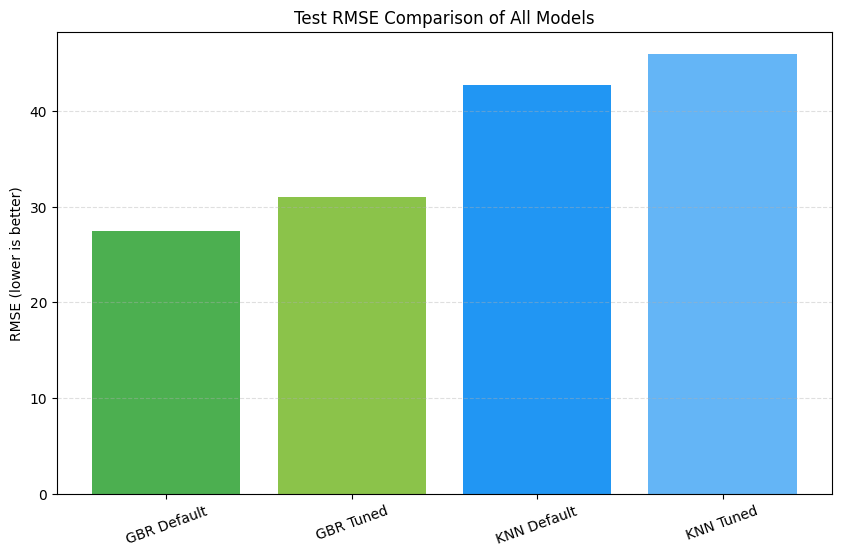

In [29]:
labels = ['GBR Default', 'GBR Tuned', 'KNN Default', 'KNN Tuned']
rmse_values = [
    gbr_default_results["test_RMSE"].mean(),
    gbr_tuned_results["test_RMSE"].mean(),
    knn_default_results["test_RMSE"].mean(),
    knn_tuned_results["test_RMSE"].mean()
]
plt.figure(figsize=(10,6))
plt.bar(labels, rmse_values, color=['#4CAF50','#8BC34A','#2196F3','#64B5F6'])
plt.title("Test RMSE Comparison of All Models")
plt.ylabel("RMSE (lower is better)")
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

MAE - (GBR VS KNN)

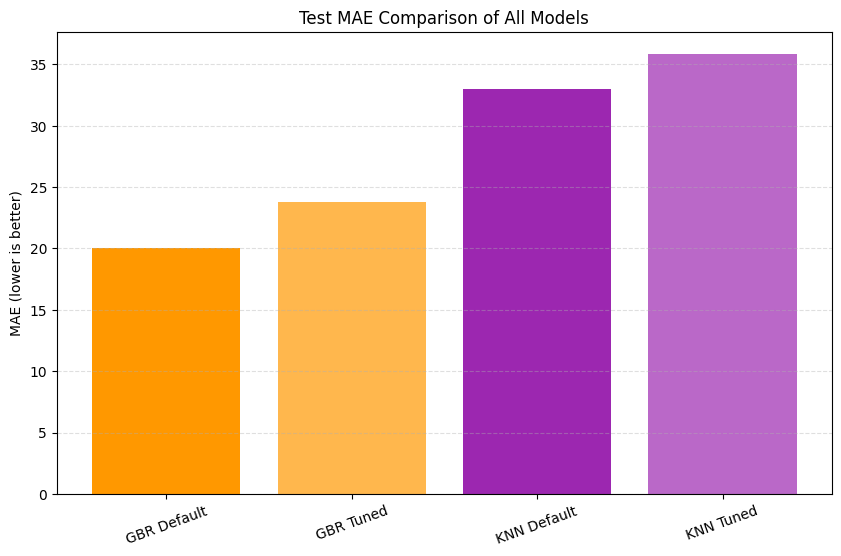

In [ ]:
labels = ['GBR Default', 'GBR Tuned', 'KNN Default', 'KNN Tuned']
mae_values = [
    gbr_default_results["test_MAE"].mean(),
    gbr_tuned_results["test_MAE"].mean(),
    knn_default_results["test_MAE"].mean(),
    knn_tuned_results["test_MAE"].mean()
]

plt.figure(figsize=(10,6))
plt.bar(labels, mae_values, color=['#FF9800','#FFB74D','#9C27B0','#BA68C8'])

plt.title("Test MAE Comparison of All Models")
plt.ylabel("MAE (lower is better)")
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()